### Force field - one component

#### Small atom

Reading data	0.33 s
Preparing input	1.75 s



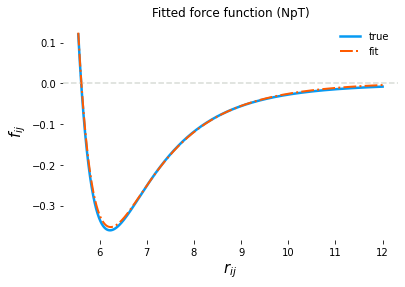

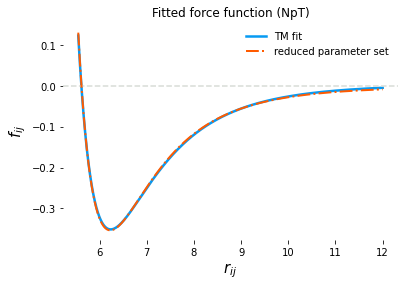

In [5]:
import numpy as np
from trajectory_matching import TrajectoryMatching
from misc import plot_1component

def target_function(x):
    return 24 * 0.75 / x * (2 * 5 ** 12 * x ** (-12) - 5 ** 6 * x ** (-6))

def basis_function(x, p):
    return np.sign(x) * np.abs(x) ** p

outfile = "/home/markjenei//polymerisation-coarse-graining/lj_test/one_component_files/lj_trajectory_match_npt.out"
params = range(-1, -15, -2)
simulation_timestep = 0.5

# These parameters affect the accuracy of the fit. 'steps' = {'NVE': , 'NpT': 5/100}
steps = 3
timesteps_in_fit = 110

proc = TrajectoryMatching(outfile_path=outfile, simulation_timestep=simulation_timestep, cutoff=15,
                      basis=basis_function, basis_parameters=params,
                      every_n_from_output=steps, timesteps_in_fit=timesteps_in_fit)


x = np.linspace(5.55, 12, 10000)
proc.prepare_training_data()
proc.fit()
y_fit = proc.predict(x)
y = target_function(x)
plot_1component(x, y_fit, y)
proc.best_subset((-7, -13), x)

## Heavy atom

Reading data	0.97 s
Preparing input	4.94 s



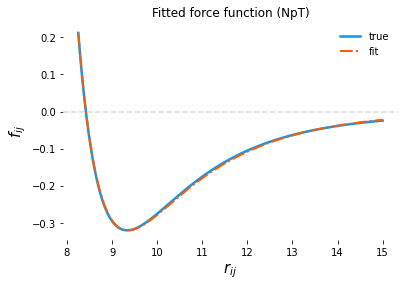

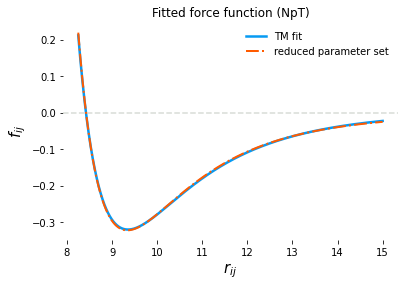

In [4]:
import numpy as np
from trajectory_matching import TrajectoryMatching
from misc import plot_1component

def target_function(x):
    return 24 * 1.0 / x * (2 * (7.5/x) ** 12 - (7.5/x) ** 6)

def basis_function(x, p):
    return np.sign(x) * np.abs(x) ** p

outfile = "/home/markjenei/polymerisation-coarse-graining/lj_test/one_component_files/lj_trajectory_match_heavy_npt.out"
params = range(-1, -15, -2)
simulation_timestep = 0.5

# These parameters affect the accuracy of the fit. 'steps' = {'NVE': , 'NpT': 6/200}
steps = 6
timesteps_in_fit = 300

proc = TrajectoryMatching(outfile_path=outfile, simulation_timestep=simulation_timestep, cutoff=15,
                      basis=basis_function, basis_parameters=params,
                      every_n_from_output=steps, timesteps_in_fit=timesteps_in_fit, op_sys='W')

x = np.linspace(8.25, 15, 10000)
proc.prepare_training_data()
proc.fit()
y_fit = proc.predict(x)
y = target_function(x)
plot_1component(x, y_fit, y)
proc.best_subset((-7, -13), x)


### Force field - multi-component

Reading data	1.16 s
Preparing input	108.8 s



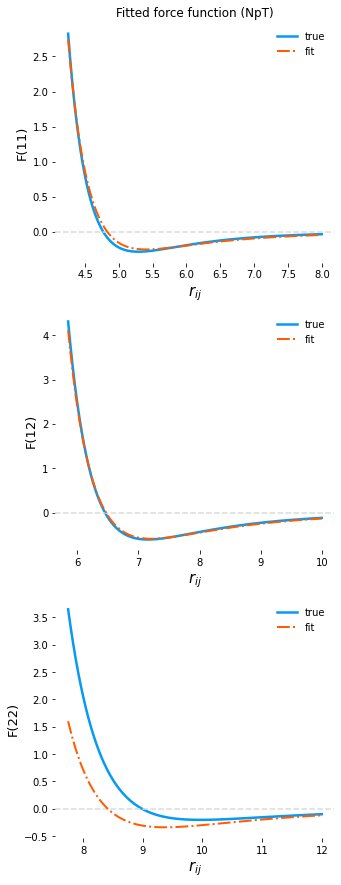

In [3]:
import numpy as np
from trajectory_matching import TrajectoryMatching
from misc import plot_2component


X = [np.linspace(4.25, 8, 1000), np.linspace(5.85, 10, 1000), np.linspace(7.75, 12, 1000)]

def target_function0(x):
    return 24 * 0.50 / x * (2 * (4.25/x) ** 12 - (4.25/x) ** 6)

def target_function1(x):
    return 24 * 1.45 / x * (2 * (5.75/x) ** 12 - (5.75/x) ** 6)

def target_function2(x):
    return 24 * 1.00 / x * (2 * (7.75/x) ** 12 - (7.5/x) ** 6)

def basis_function(x, p):
    return np.sign(x) * np.abs(x) ** p

outfile = "/home/markjenei/polymerisation-coarse-graining/lj_test/two_component_files/lj_trajectory_match_npt.out"
params = range(-1, -15, -2)
simulation_timestep = 0.5
# These parameters affect the accuracy of the fit. 'steps' = {'NVE': 2/75, 'NpT': 2/150}
steps = 2
timesteps_in_fit = 150

proc = TrajectoryMatching(outfile_path=outfile, simulation_timestep=simulation_timestep, cutoff=15,
                      basis=basis_function, basis_parameters=params,
                      every_n_from_output=steps, timesteps_in_fit=timesteps_in_fit, op_sys='W')

proc.prepare_training_data()
proc.fit()

Y = [target_function0(X[0]), target_function1(X[1]), target_function2(X[2])]
Y_fit = [proc.predict(X[0])[0], proc.predict(X[1])[1], proc.predict(X[2])[2]]
plot_2component(X, Y_fit, Y)